In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import dendrogram, linkage

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data=pd.read_csv("ClusterData.csv")

In [3]:
data.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


In [4]:
data.describe()

,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,nfl,mlb,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.0000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,-0.000833,-0.012500,0.060625,0.013542,0.031667,-0.030000,-0.026250,-0.025000,-0.027292,0.021458,...,-0.003542,0.015000,49.695833,50.593750,50.1250,50.185417,49.427083,1.791667,2.604167,4.958333
std,0.971397,0.972073,0.982906,1.023726,0.974069,0.910588,0.984956,0.998769,1.017104,1.010104,...,1.010908,0.991743,9.862975,9.192166,10.0659,10.030952,9.267117,0.874176,1.046566,2.483634
min,-1.270000,-1.700000,-1.960000,-1.830000,-1.940000,-1.380000,-2.400000,-1.720000,-2.560000,-1.500000,...,-1.770000,-1.720000,26.500000,29.800000,24.0000,30.400000,21.800000,1.000000,1.000000,1.000000
25%,-0.662500,-0.730000,-0.617500,-0.650000,-0.607500,-0.675000,-0.732500,-0.855000,-0.650000,-0.812500,...,-0.730000,-0.537500,44.350000,45.775000,43.0500,43.850000,42.700000,1.000000,2.000000,3.000000
50%,-0.235000,-0.135000,-0.050000,-0.055000,0.070000,-0.115000,-0.005000,-0.130000,-0.140000,-0.035000,...,-0.105000,-0.165000,51.150000,52.050000,51.3500,49.000000,49.850000,1.500000,3.000000,5.000000
75%,0.352500,0.412500,0.747500,0.332500,0.485000,0.420000,0.537500,0.612500,0.702500,0.867500,...,0.462500,0.387500,56.050000,56.625000,56.1250,56.925000,56.675000,3.000000,3.000000,7.000000
max,2.730000,2.910000,2.360000,2.630000,2.740000,2.460000,1.890000,2.120000,2.090000,2.490000,...,2.590000,3.220000,69.800000,69.400000,69.6000,79.200000,65.000000,3.000000,4.000000,9.000000


In [5]:
data.values

array([['Alabama', 'AL', -1.0, ..., 1L, 3L, 6L],
       ['Arizona', 'AZ', -0.42, ..., 2L, 4L, 8L],
       ['Arkansas', 'AR', -0.66, ..., 1L, 3L, 7L],
       ..., 
       ['West Virginia', 'WV', -0.82, ..., 3L, 3L, 5L],
       ['Wisconsin', 'WI', -0.3, ..., 1L, 2L, 3L],
       ['Wyoming', 'WY', -1.17, ..., 1L, 4L, 8L]], dtype=object)

In [6]:
data.columns.values

array(['State', 'state_code', 'data science', 'cluster analysis',
       'college', 'startup', 'entrepreneur', 'ceo', 'mortgage', 'nba',
       'nfl', 'mlb', 'fifa', 'modern dance', 'prius', 'escalade', 'subaru',
       'jello', 'bbq', 'royal family', 'obfuscation', 'unicorn',
       'Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism',
       'Openness', 'PsychRegions', 'region', 'division'], dtype=object)

In [8]:
st=data[data.columns[2:]]
st.index=data.ix[:,1]

In [9]:
X=linkage(st,"ward")

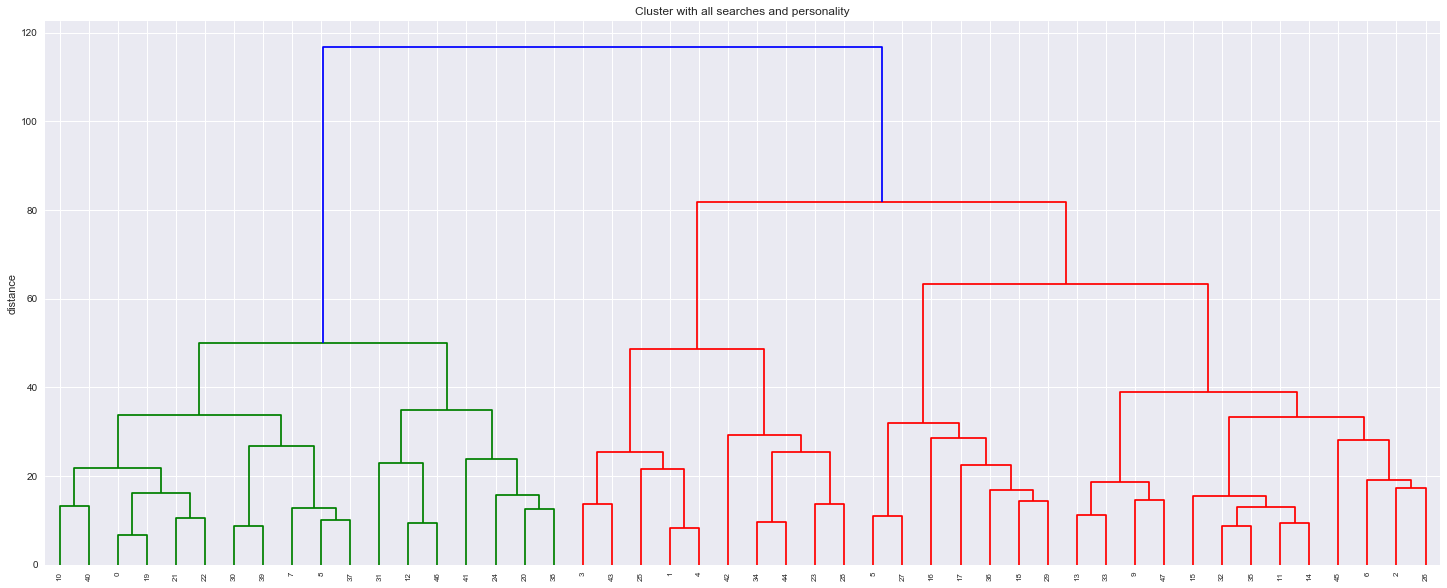

In [11]:
plt.figure(figsize=(25,10))
plt.title("Cluster with all searches and personality")
plt.ylabel("distance")
dendrogram(X)
plt.show()